# 🌍 Cross-Country Solar Comparison

Compare solar potential across Benin, Togo, and Sierra Leone using cleaned data.


In [ ]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

sns.set_theme(style="whitegrid")


In [2]:
# 📥 Load cleaned datasets
benin = pd.read_csv("../data/benin_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")
sierra = pd.read_csv("../data/sierra_leone_clean.csv")

# Add country labels
benin["Country"] = "Benin"
togo["Country"] = "Togo"
sierra["Country"] = "Sierra Leone"

# Combine into one DataFrame
df_all = pd.concat([benin, togo, sierra], ignore_index=True)
df_all.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


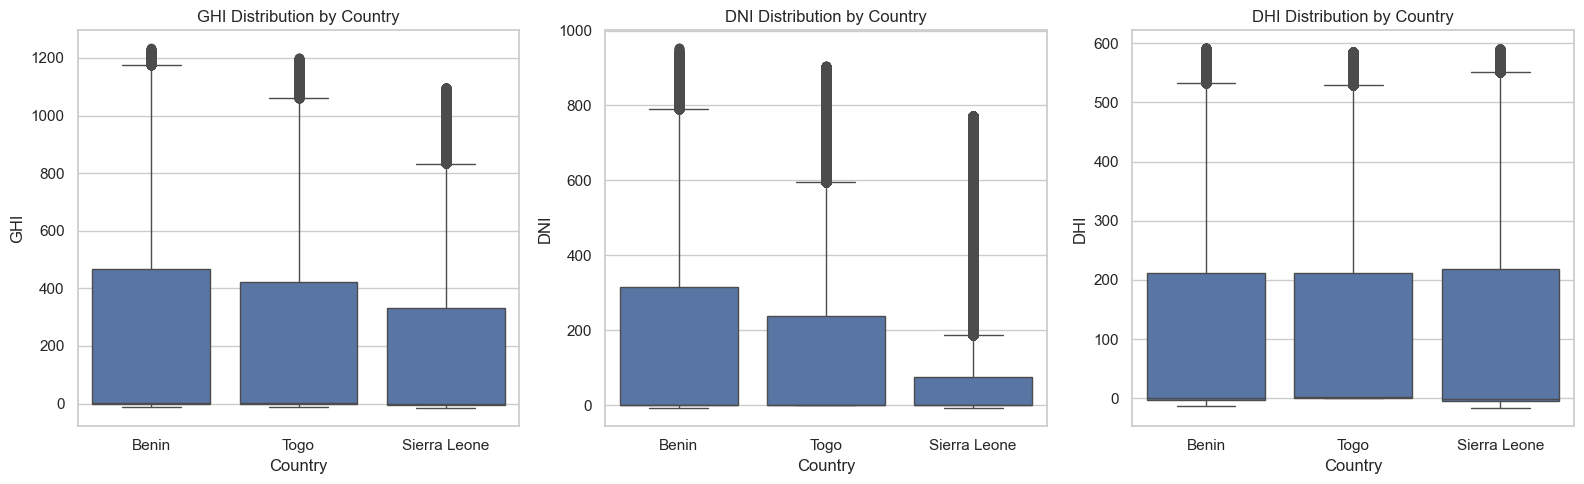

In [3]:
# 📊 Boxplots of GHI, DNI, DHI
plt.figure(figsize=(16, 5))
for i, col in enumerate(["GHI", "DNI", "DHI"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df_all, x="Country", y=col)
    plt.title(f"{col} Distribution by Country")
plt.tight_layout()
plt.show()


In [4]:
# 📋 Summary Statistics
summary = df_all.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"]).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         236.23    0.7  328.29  166.90   -0.1  262.08  111.66    0.5   
Sierra Leone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo          223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         153.10  
Sierra Leone  153.69  
Togo          151.57

In [5]:
# 🧪 ANOVA Test for GHI
f_stat, p_val = f_oneway(
    benin["GHI"].dropna(),
    togo["GHI"].dropna(),
    sierra["GHI"].dropna()
)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")


ANOVA F-statistic: 3833.18, p-value: 0.0000


In [6]:
# (Optional) Kruskal-Wallis Test (Non-parametric)
kw_stat, kw_p = kruskal(
    benin["GHI"].dropna(),
    togo["GHI"].dropna(),
    sierra["GHI"].dropna()
)
print(f"Kruskal-Wallis stat: {kw_stat:.2f}, p-value: {kw_p:.4f}")


Kruskal-Wallis stat: 6548.53, p-value: 0.0000


C:\Users\HP\AppData\Local\Temp\ipykernel_10412\3092855344.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_all, x="Country", y="GHI", estimator='mean', ci=None)


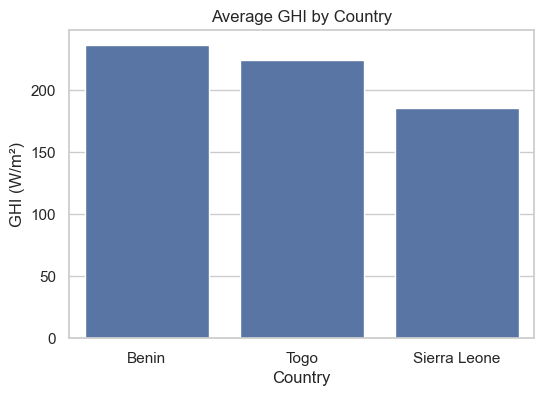

In [7]:
# 📈 Bar Chart of Average GHI
plt.figure(figsize=(6, 4))
sns.barplot(data=df_all, x="Country", y="GHI", estimator='mean', ci=None)
plt.title("Average GHI by Country")
plt.ylabel("GHI (W/m²)")
plt.show()


## 📝 Key Observations

- Benin shows the highest **average GHI**, indicating stronger solar potential.
- Sierra Leone has the **lowest median GHI** but also lower variability.
- ANOVA p-value shows whether the differences are **statistically significant**.
